## Analysis of spatial factors and their associated gene signatures

In this analysis, we utilize an external single-cell RNA-sequencing (scRNA-seq) dataset to validate the gene signatures identified for various spatial factors.

We show that spatial factors correspond to detailed cell types or subtypes in tissues.

The scRNA-seq data is publicly avaliable at https://portal.brain-map.org/atlases-and-data/rnaseq M1 - 10X GENOMICS (2020).

In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import anndata as ad
import umap
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import scipy.io
import matplotlib as mpl

import warnings
warnings.filterwarnings("ignore")

### Visualization of layer-specific spatial factors

In [2]:
res_dir = "Results/INSPIRE_DLPFC"
adata = sc.read_h5ad(res_dir + "/adata_inspire.h5ad")
basis_df = pd.read_csv(res_dir + "/basis_df_inspire.csv", index_col=0)

In [3]:
slice1_idx = 151673
slice2_idx = 151674
slice3_idx = 151675
slice4_idx = 151676

data_dir = "data/DLPFC/spatialLIBD"

slice_idx = 151673
adata_st = sc.read_visium(path=data_dir+"/%d" % slice_idx,
                          count_file="%d_filtered_feature_bc_matrix.h5" % slice_idx)
anno_df = pd.read_csv(data_dir+'/barcode_level_layer_map.tsv', sep='\t', header=None)
anno_df = anno_df.iloc[anno_df[1].values.astype(str) == str(slice_idx)]
anno_df.columns = ["barcode", "slice_id", "layer"]
anno_df.index = anno_df['barcode']
adata_st.obs = adata_st.obs.join(anno_df, how="left")
adata_st = adata_st[adata_st.obs['layer'].notna()]
adata_st1 = adata_st.copy()
adata_st1.var_names_make_unique()
adata_st1.obs.index = adata_st1.obs.index + "-0"

slice_idx = 151674
adata_st = sc.read_visium(path=data_dir+"/%d" % slice_idx,
                          count_file="%d_filtered_feature_bc_matrix.h5" % slice_idx)
anno_df = pd.read_csv(data_dir+'/barcode_level_layer_map.tsv', sep='\t', header=None)
anno_df = anno_df.iloc[anno_df[1].values.astype(str) == str(slice_idx)]
anno_df.columns = ["barcode", "slice_id", "layer"]
anno_df.index = anno_df['barcode']
adata_st.obs = adata_st.obs.join(anno_df, how="left")
adata_st = adata_st[adata_st.obs['layer'].notna()]
adata_st2 = adata_st.copy()
adata_st2.var_names_make_unique()
adata_st2.obs.index = adata_st2.obs.index + "-1"

slice_idx = 151675
adata_st = sc.read_visium(path=data_dir+"/%d" % slice_idx,
                          count_file="%d_filtered_feature_bc_matrix.h5" % slice_idx)
anno_df = pd.read_csv(data_dir+'/barcode_level_layer_map.tsv', sep='\t', header=None)
anno_df = anno_df.iloc[anno_df[1].values.astype(str) == str(slice_idx)]
anno_df.columns = ["barcode", "slice_id", "layer"]
anno_df.index = anno_df['barcode']
adata_st.obs = adata_st.obs.join(anno_df, how="left")
adata_st = adata_st[adata_st.obs['layer'].notna()]
adata_st3 = adata_st.copy()
adata_st3.var_names_make_unique()
adata_st3.obs.index = adata_st3.obs.index + "-2"

slice_idx = 151676
adata_st = sc.read_visium(path=data_dir+"/%d" % slice_idx,
                          count_file="%d_filtered_feature_bc_matrix.h5" % slice_idx)
anno_df = pd.read_csv(data_dir+'/barcode_level_layer_map.tsv', sep='\t', header=None)
anno_df = anno_df.iloc[anno_df[1].values.astype(str) == str(slice_idx)]
anno_df.columns = ["barcode", "slice_id", "layer"]
anno_df.index = anno_df['barcode']
adata_st.obs = adata_st.obs.join(anno_df, how="left")
adata_st = adata_st[adata_st.obs['layer'].notna()]
adata_st4 = adata_st.copy()
adata_st4.var_names_make_unique()
adata_st4.obs.index = adata_st4.obs.index + "-3"

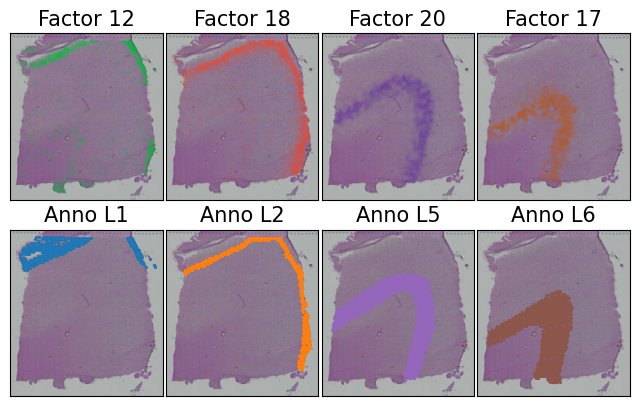

In [4]:
adata = adata[adata_st1.obs.index, :]

fig = plt.figure(figsize=(8,5))
fs = 15

## factor 8,11
c_hex = "#00BA38"
size = 1.
ax0 = fig.add_subplot(2,4,1)
ax0.imshow(adata_st1.uns["spatial"][str(slice1_idx)]['images']['lowres'])
x_coor = adata.obsm["spatial"][:, 0] * adata_st1.uns["spatial"][str(slice1_idx)]['scalefactors']['tissue_lowres_scalef']
y_coor = adata.obsm["spatial"][:, 1] * adata_st1.uns["spatial"][str(slice1_idx)]['scalefactors']['tissue_lowres_scalef']
factor_id = 11
scatter0 = ax0.scatter(x_coor, y_coor, s=size, rasterized=True, c="gray", alpha=0.2)
scatter0 = ax0.scatter(x_coor, y_coor, s=size+0.2, rasterized=True, c=c_hex, alpha=adata.obs["Proportion of spatial factor "+str(factor_id+1)].values)
xmin, xmax = np.min(x_coor)-20, np.max(x_coor)+20
ymin, ymax = np.min(y_coor)-20, np.max(y_coor)+20
ax0.set_xlim(xmin, xmax)
ax0.set_ylim(ymin, ymax)
ax0.invert_yaxis()
ax0.tick_params(axis='both',bottom=False, top=False, left=False, right=False, labelleft=False, labelbottom=False, grid_alpha=0)
ax0.set_title("Factor 12", fontsize=fs)

## layer 1
c_hex = "#1f77b4"
layer_name = "L1"
size = 1.5
ax0 = fig.add_subplot(2,4,5)
ax0.imshow(adata_st1.uns["spatial"][str(slice1_idx)]['images']['lowres'])
x_coor = adata.obsm["spatial"][:, 0] * adata_st1.uns["spatial"][str(slice1_idx)]['scalefactors']['tissue_lowres_scalef']
y_coor = adata.obsm["spatial"][:, 1] * adata_st1.uns["spatial"][str(slice1_idx)]['scalefactors']['tissue_lowres_scalef']
scatter0 = ax0.scatter(x_coor, y_coor, s=size, rasterized=True, c="gray", alpha=0.2)
scatter0 = ax0.scatter(x_coor[adata.obs["layer"].values.astype(str) == layer_name], 
                       y_coor[adata.obs["layer"].values.astype(str) == layer_name], 
                       s=size, rasterized=True, c=c_hex, alpha=1)
ax0.set_xlim(xmin, xmax)
ax0.set_ylim(ymin, ymax)
ax0.invert_yaxis()
ax0.tick_params(axis='both',bottom=False, top=False, left=False, right=False, labelleft=False, labelbottom=False, grid_alpha=0)
ax0.set_title("Anno L1", fontsize=fs)

## factor 17
c_hex = "#E64B35FF"
factor_id = 17
size = 1.
ax0 = fig.add_subplot(2,4,2)
ax0.imshow(adata_st1.uns["spatial"][str(slice1_idx)]['images']['lowres'])
x_coor = adata.obsm["spatial"][:, 0] * adata_st1.uns["spatial"][str(slice1_idx)]['scalefactors']['tissue_lowres_scalef']
y_coor = adata.obsm["spatial"][:, 1] * adata_st1.uns["spatial"][str(slice1_idx)]['scalefactors']['tissue_lowres_scalef']
scatter0 = ax0.scatter(x_coor, y_coor, s=size, rasterized=True, c="gray", alpha=0.2)
scatter0 = ax0.scatter(x_coor, y_coor, s=size+0.2, rasterized=True, c=c_hex, alpha=adata.obs["Proportion of spatial factor "+str(factor_id+1)].values)
xmin, xmax = np.min(x_coor)-20, np.max(x_coor)+20
ymin, ymax = np.min(y_coor)-20, np.max(y_coor)+20
ax0.set_xlim(xmin, xmax)
ax0.set_ylim(ymin, ymax)
ax0.invert_yaxis()
ax0.tick_params(axis='both',bottom=False, top=False, left=False, right=False, labelleft=False, labelbottom=False, grid_alpha=0)
ax0.set_title("Factor 18", fontsize=fs)

## layer 2
c_hex = "#ff7f0e"
layer_name = "L2"
size = 1.5
ax0 = fig.add_subplot(2,4,6)
ax0.imshow(adata_st1.uns["spatial"][str(slice1_idx)]['images']['lowres'])
x_coor = adata.obsm["spatial"][:, 0] * adata_st1.uns["spatial"][str(slice1_idx)]['scalefactors']['tissue_lowres_scalef']
y_coor = adata.obsm["spatial"][:, 1] * adata_st1.uns["spatial"][str(slice1_idx)]['scalefactors']['tissue_lowres_scalef']
scatter0 = ax0.scatter(x_coor, y_coor, s=size, rasterized=True, c="gray", alpha=0.2)
scatter0 = ax0.scatter(x_coor[adata.obs["layer"].values.astype(str) == layer_name], 
                       y_coor[adata.obs["layer"].values.astype(str) == layer_name], 
                       s=size, rasterized=True, c=c_hex, alpha=1)
ax0.set_xlim(xmin, xmax)
ax0.set_ylim(ymin, ymax)
ax0.invert_yaxis()
ax0.tick_params(axis='both',bottom=False, top=False, left=False, right=False, labelleft=False, labelbottom=False, grid_alpha=0)
ax0.set_title("Anno L2", fontsize=fs)

## factor 19
c_hex = "#6A3D9A"
factor_id = 19
size = 1.
ax0 = fig.add_subplot(2,4,3)
ax0.imshow(adata_st1.uns["spatial"][str(slice1_idx)]['images']['lowres'])
x_coor = adata.obsm["spatial"][:, 0] * adata_st1.uns["spatial"][str(slice1_idx)]['scalefactors']['tissue_lowres_scalef']
y_coor = adata.obsm["spatial"][:, 1] * adata_st1.uns["spatial"][str(slice1_idx)]['scalefactors']['tissue_lowres_scalef']
scatter0 = ax0.scatter(x_coor, y_coor, s=size, rasterized=True, c="gray", alpha=0.2)
scatter0 = ax0.scatter(x_coor, y_coor, s=size+0.2, rasterized=True, c=c_hex, alpha=adata.obs["Proportion of spatial factor "+str(factor_id+1)].values)
xmin, xmax = np.min(x_coor)-20, np.max(x_coor)+20
ymin, ymax = np.min(y_coor)-20, np.max(y_coor)+20
ax0.set_xlim(xmin, xmax)
ax0.set_ylim(ymin, ymax)
ax0.invert_yaxis()
ax0.tick_params(axis='both',bottom=False, top=False, left=False, right=False, labelleft=False, labelbottom=False, grid_alpha=0)
ax0.set_title("Factor 20", fontsize=fs)

## layer 5
c_hex = "#9467bd"
layer_name = "L5"
size = 1.5
ax0 = fig.add_subplot(2,4,7)
ax0.imshow(adata_st1.uns["spatial"][str(slice1_idx)]['images']['lowres'])
x_coor = adata.obsm["spatial"][:, 0] * adata_st1.uns["spatial"][str(slice1_idx)]['scalefactors']['tissue_lowres_scalef']
y_coor = adata.obsm["spatial"][:, 1] * adata_st1.uns["spatial"][str(slice1_idx)]['scalefactors']['tissue_lowres_scalef']
scatter0 = ax0.scatter(x_coor, y_coor, s=size, rasterized=True, c="gray", alpha=0.2)
scatter0 = ax0.scatter(x_coor[adata.obs["layer"].values.astype(str) == layer_name], 
                       y_coor[adata.obs["layer"].values.astype(str) == layer_name], 
                       s=size, rasterized=True, c=c_hex, alpha=1)
ax0.set_xlim(xmin, xmax)
ax0.set_ylim(ymin, ymax)
ax0.invert_yaxis()
ax0.tick_params(axis='both',bottom=False, top=False, left=False, right=False, labelleft=False, labelbottom=False, grid_alpha=0)
ax0.set_title("Anno L5", fontsize=fs)

## factor 16
c_hex = "#B15928"
factor_id = 16
size = 1.
ax0 = fig.add_subplot(2,4,4)
ax0.imshow(adata_st1.uns["spatial"][str(slice1_idx)]['images']['lowres'])
x_coor = adata.obsm["spatial"][:, 0] * adata_st1.uns["spatial"][str(slice1_idx)]['scalefactors']['tissue_lowres_scalef']
y_coor = adata.obsm["spatial"][:, 1] * adata_st1.uns["spatial"][str(slice1_idx)]['scalefactors']['tissue_lowres_scalef']
scatter0 = ax0.scatter(x_coor, y_coor, s=size, rasterized=True, c="gray", alpha=0.2)
scatter0 = ax0.scatter(x_coor, y_coor, s=size+0.2, rasterized=True, c=c_hex, alpha=adata.obs["Proportion of spatial factor "+str(factor_id+1)].values)
xmin, xmax = np.min(x_coor)-20, np.max(x_coor)+20
ymin, ymax = np.min(y_coor)-20, np.max(y_coor)+20
ax0.set_xlim(xmin, xmax)
ax0.set_ylim(ymin, ymax)
ax0.invert_yaxis()
ax0.tick_params(axis='both',bottom=False, top=False, left=False, right=False, labelleft=False, labelbottom=False, grid_alpha=0)
ax0.set_title("Factor 17", fontsize=fs)

## layer 6
c_hex = "#8c564b"
layer_name = "L6"
size = 1.5
ax0 = fig.add_subplot(2,4,8)
ax0.imshow(adata_st1.uns["spatial"][str(slice1_idx)]['images']['lowres'])
x_coor = adata.obsm["spatial"][:, 0] * adata_st1.uns["spatial"][str(slice1_idx)]['scalefactors']['tissue_lowres_scalef']
y_coor = adata.obsm["spatial"][:, 1] * adata_st1.uns["spatial"][str(slice1_idx)]['scalefactors']['tissue_lowres_scalef']
scatter0 = ax0.scatter(x_coor, y_coor, s=size, rasterized=True, c="gray", alpha=0.2)
scatter0 = ax0.scatter(x_coor[adata.obs["layer"].values.astype(str) == layer_name], 
                       y_coor[adata.obs["layer"].values.astype(str) == layer_name], 
                       s=size, rasterized=True, c=c_hex, alpha=1)
ax0.set_xlim(xmin, xmax)
ax0.set_ylim(ymin, ymax)
ax0.invert_yaxis()
ax0.tick_params(axis='both',bottom=False, top=False, left=False, right=False, labelleft=False, labelbottom=False, grid_alpha=0)
ax0.set_title("Anno L6", fontsize=fs)


fig.subplots_adjust(hspace=0.04, wspace=0.02)
plt.show()

### Identify cell type markers using scRNA-seq data and evaluate their gene rankings for corresponding spatial factors.

In [5]:
res_dir = "Results/INSPIRE_DLPFC"
adata = sc.read_h5ad(res_dir + "/adata_inspire.h5ad")
basis_df = pd.read_csv(res_dir + "/basis_df_inspire.csv", index_col=0)

In [6]:
## single cell 10x data: https://portal.brain-map.org/atlases-and-data/rnaseq M1 - 10X GENOMICS (2020)
res_path = "data/DLPFC/AllenBrainMap_10x/"
adata_ref = sc.read_h5ad(res_path + "adata_sc_10x_celltype_subset.h5ad")
shared_genes = adata_ref.var.index & basis_df.columns
adata_ref = adata_ref[:, shared_genes]

sc.pp.normalize_total(adata_ref, target_sum=1)
ct_list = sorted(list(set(adata_ref.obs["ct"])))
ct_basis = np.zeros((len(ct_list), adata_ref.shape[1]))
for i in range(len(ct_list)):
    ct = ct_list[i]
    ad_tmp = adata_ref[adata_ref.obs["ct"] == ct, :].copy()
    profile = np.mean(ad_tmp.X, axis=0)
    ct_basis[i, :] = profile
ct_basis_df = pd.DataFrame(data=ct_basis, index=ct_list, columns=adata_ref.var.index)

In [7]:
res_path = "data/DLPFC/AllenBrainMap_10x/"
adata_ref = sc.read_h5ad(res_path + "adata_sc_10x_celltype_subset.h5ad")
shared_genes = adata_ref.var.index & basis_df.columns
adata_ref = adata_ref[:, shared_genes]

In [8]:
sc.pp.normalize_total(adata_ref, target_sum=1e4)
sc.pp.log1p(adata_ref)
adata_ref.raw = adata_ref
sc.pp.scale(adata_ref, max_value=10)
sc.tl.rank_genes_groups(adata_ref, groupby="ct", method="t-test", key_added="ttest")

result = adata_ref.uns['ttest']
groups = result['names'].dtype.names
df_genes = pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']}).head(200)

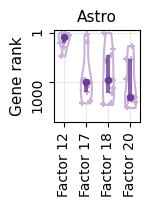

In [9]:
ct = "Astro"

potential_marker = list(df_genes[ct+"_n"])[:10]
marker = []
for i in range(len(potential_marker)):
    id_1 = np.argsort(-ct_basis_df[potential_marker[i]])[0]
    id_2 = np.argsort(-ct_basis_df[potential_marker[i]])[1]
    ct_1 = ct_basis_df.index[id_1]
    val_1 = ct_basis_df[potential_marker[i]][id_1]
    val_2 = ct_basis_df[potential_marker[i]][id_2]
    if (ct_1 == ct) & (val_1 >= (val_2*1.5)):
        marker.append(potential_marker[i])
marker_astro = marker

factor_list = [11,16,17,19]
rank_list = []
for t in factor_list:
    topic_profile = np.array(basis_df.iloc[t, :])
    order = np.argsort(-topic_profile)
    order_gene = basis_df.columns[order]

    rank = []
    for g in marker:
        rk = np.where(order_gene == g)[0][0]
        rank.append(rk)

    rank_list.append(rank)

c_hex = "#CAB2D6"
fig = plt.figure(figsize=(1.1,1.2))
ax = fig.add_subplot(111)
parts = ax.violinplot(
        rank_list, showmeans=False, showmedians=False,
        showextrema=False, widths=0.5)
plt.ylim(1800,-50)
for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor('white')
    pc.set_edgecolor(c_hex)
    pc.set_alpha(1.0)
    pc.set_linewidth(1.5)
for i in range(len(rank_list)):
    ax.scatter(np.random.uniform(i+0.75,i+1.25,len(rank_list[i])), rank_list[i], c=c_hex, marker='+', s=15)
quartile1, medians, quartile3 = np.percentile(rank_list, [25, 50, 75], axis=1)
inds = np.arange(1, len(medians) + 1)
for i, pc in enumerate(parts['bodies']):
    ax.scatter(inds[i], medians[i], marker='o', color="#6A3D9A", s=20, zorder=3)
    ax.vlines(inds[i], quartile1[i], quartile3[i], color="#6A3D9A", linestyle='-', lw=3, alpha=0.8)

ax.grid(color="lightgray", alpha=0.5)
ax.set_axisbelow(True)
plt.xticks(np.arange(4)+1, ["Factor "+str(i+1) for i in [11,16,17,19]], rotation=90, fontsize=10)
plt.yticks([1,1000], [1,1000], rotation=90, fontsize=10)
plt.ylabel("Gene rank", fontsize=11)
plt.title("Astro", fontsize=11)
plt.show()

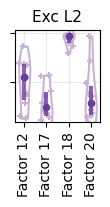

In [10]:
ct = "Exc L2"

potential_marker = list(df_genes[ct+"_n"])[:10]
marker = []
for i in range(len(potential_marker)):
    id_1 = np.argsort(-ct_basis_df[potential_marker[i]])[0]
    id_2 = np.argsort(-ct_basis_df[potential_marker[i]])[1]
    ct_1 = ct_basis_df.index[id_1]
    val_1 = ct_basis_df[potential_marker[i]][id_1]
    val_2 = ct_basis_df[potential_marker[i]][id_2]
    if (ct_1 == ct) & (val_1 >= (val_2*1.5)):
        marker.append(potential_marker[i])
marker_L2 = marker

topic_list = [11,16,17,19]
rank_list = []
for t in topic_list:
    topic_profile = np.array(basis_df.iloc[t, :])
    order = np.argsort(-topic_profile)
    order_gene = basis_df.columns[order]

    rank = []
    for g in marker:
        rk = np.where(order_gene == g)[0][0]
        rank.append(rk)

    rank_list.append(rank)

c_hex = "#CAB2D6"
fig = plt.figure(figsize=(1.1,1.2))
ax = fig.add_subplot(111)
parts = ax.violinplot(
        rank_list, showmeans=False, showmedians=False,
        showextrema=False, widths=0.5)
plt.ylim(1800,-50)
for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor('white')
    pc.set_edgecolor(c_hex)
    pc.set_alpha(1.0)
    pc.set_linewidth(1.5)
for i in range(len(rank_list)):
    ax.scatter(np.random.uniform(i+0.75,i+1.25,len(rank_list[i])), rank_list[i], c=c_hex, marker='+', s=15)
quartile1, medians, quartile3 = np.percentile(rank_list, [25, 50, 75], axis=1)
inds = np.arange(1, len(medians) + 1)
for i, pc in enumerate(parts['bodies']):
    ax.scatter(inds[i], medians[i], marker='o', color="#6A3D9A", s=20, zorder=3)
    ax.vlines(inds[i], quartile1[i], quartile3[i], color="#6A3D9A", linestyle='-', lw=3, alpha=0.8)

ax.grid(color="lightgray", alpha=0.5)
ax.set_axisbelow(True)
plt.xticks(np.arange(4)+1, ["Factor "+str(i+1) for i in [11,16,17,19]], rotation=90, fontsize=10)
# plt.yticks([1,1000], [1,1000], rotation=90, fontsize=10)
# plt.ylabel("Gene rank", fontsize=11)
plt.yticks([1,1000], ["",""], rotation=90, fontsize=10)
plt.title("Exc L2", fontsize=11)
plt.show()

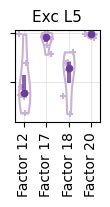

In [11]:
ct = "Exc L5"

potential_marker = list(df_genes[ct+"_n"])[:15]
marker = []
for i in range(len(potential_marker)):
    id_1 = np.argsort(-ct_basis_df[potential_marker[i]])[0]
    id_2 = np.argsort(-ct_basis_df[potential_marker[i]])[1]
    ct_1 = ct_basis_df.index[id_1]
    val_1 = ct_basis_df[potential_marker[i]][id_1]
    val_2 = ct_basis_df[potential_marker[i]][id_2]
    if (ct_1 == ct) & (val_1 >= (val_2*1.5)):
        marker.append(potential_marker[i])
marker_L5 = marker

topic_list = [11,16,17,19]
rank_list = []
for t in topic_list:
    topic_profile = np.array(basis_df.iloc[t, :])
    order = np.argsort(-topic_profile)
    order_gene = basis_df.columns[order]

    rank = []
    for g in marker:
        rk = np.where(order_gene == g)[0][0]
        rank.append(rk)

    rank_list.append(rank)

c_hex = "#CAB2D6"
fig = plt.figure(figsize=(1.1,1.2))
ax = fig.add_subplot(111)
parts = ax.violinplot(
        rank_list, showmeans=False, showmedians=False,
        showextrema=False, widths=0.5)
plt.ylim(1800,-50)
for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor('white')
    pc.set_edgecolor(c_hex)
    pc.set_alpha(1.0)
    pc.set_linewidth(1.5)
for i in range(len(rank_list)):
    ax.scatter(np.random.uniform(i+0.75,i+1.25,len(rank_list[i])), rank_list[i], c=c_hex, marker='+', s=15)
quartile1, medians, quartile3 = np.percentile(rank_list, [25, 50, 75], axis=1)
inds = np.arange(1, len(medians) + 1)
for i, pc in enumerate(parts['bodies']):
    ax.scatter(inds[i], medians[i], marker='o', color="#6A3D9A", s=20, zorder=3)
    ax.vlines(inds[i], quartile1[i], quartile3[i], color="#6A3D9A", linestyle='-', lw=3, alpha=0.8)

ax.grid(color="lightgray", alpha=0.5)
ax.set_axisbelow(True)
plt.xticks(np.arange(4)+1, ["Factor "+str(i+1) for i in [11,16,17,19]], rotation=90, fontsize=10)
# plt.yticks([1,1000], [1,1000], rotation=90, fontsize=10)
# plt.ylabel("Gene rank", fontsize=11)
plt.yticks([1,1000], ["",""], rotation=90, fontsize=10)
plt.title("Exc L5", fontsize=11)
plt.show()

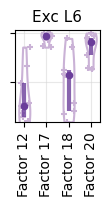

In [12]:
ct = "Exc L6"

potential_marker = list(df_genes[ct+"_n"])[:15]
marker = []
for i in range(len(potential_marker)):
    id_1 = np.argsort(-ct_basis_df[potential_marker[i]])[0]
    id_2 = np.argsort(-ct_basis_df[potential_marker[i]])[1]
    ct_1 = ct_basis_df.index[id_1]
    val_1 = ct_basis_df[potential_marker[i]][id_1]
    val_2 = ct_basis_df[potential_marker[i]][id_2]
    if (ct_1 == ct) & (val_1 >= (val_2*1.5)):
        marker.append(potential_marker[i])
marker_L6 = marker

topic_list = [11,16,17,19]
rank_list = []
for t in topic_list:
    topic_profile = np.array(basis_df.iloc[t, :])
    order = np.argsort(-topic_profile)
    order_gene = basis_df.columns[order]

    rank = []
    for g in marker:
        rk = np.where(order_gene == g)[0][0]
        rank.append(rk)

    rank_list.append(rank)

c_hex = "#CAB2D6"
fig = plt.figure(figsize=(1.1,1.2))
ax = fig.add_subplot(111)
parts = ax.violinplot(
        rank_list, showmeans=False, showmedians=False,
        showextrema=False, widths=0.5)
plt.ylim(1800,-50)
for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor('white')
    pc.set_edgecolor(c_hex)
    pc.set_alpha(1.0)
    pc.set_linewidth(1.5)
for i in range(len(rank_list)):
    ax.scatter(np.random.uniform(i+0.75,i+1.25,len(rank_list[i])), rank_list[i], c=c_hex, marker='+', s=15)
quartile1, medians, quartile3 = np.percentile(rank_list, [25, 50, 75], axis=1)
inds = np.arange(1, len(medians) + 1)
for i, pc in enumerate(parts['bodies']):
    ax.scatter(inds[i], medians[i], marker='o', color="#6A3D9A", s=20, zorder=3)
    ax.vlines(inds[i], quartile1[i], quartile3[i], color="#6A3D9A", linestyle='-', lw=3, alpha=0.8)

ax.grid(color="lightgray", alpha=0.5)
ax.set_axisbelow(True)
plt.xticks(np.arange(4)+1, ["Factor "+str(i+1) for i in [11,16,17,19]], rotation=90, fontsize=10)
# plt.yticks([1,1000], [1,1000], rotation=90, fontsize=10)
# plt.ylabel("Gene rank", fontsize=11)
plt.yticks([1,1000], ["",""], rotation=90, fontsize=10)
plt.title("Exc L6", fontsize=11)
plt.show()

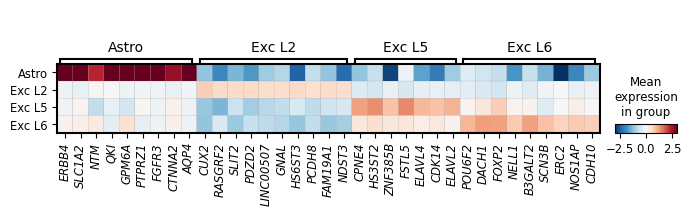

In [13]:
marker_dict = {}
marker_dict["Astro"] = marker_astro
marker_dict["Exc L2"] = marker_L2
marker_dict["Exc L5"] = marker_L5
marker_dict["Exc L6"] = marker_L6

fig, ax = plt.subplots(figsize=(8,1.6))
mt = sc.pl.matrixplot(adata_ref, marker_dict, 'ct', dendrogram=False, cmap='RdBu_r', vmin=-3, vmax=3, ax=ax, show=False, var_group_rotation=0)
ax_main = mt['mainplot_ax']
for l in ax_main.get_xticklabels():
    l.set_style('italic')
mt['color_legend_ax'].set_title("Mean\nexpression\nin group", fontsize=8.5)
plt.show()

### Identify top genes related to spatial factors and check their expression patterns in scRNA-seq data

In [14]:
adata_ref = sc.read_h5ad(res_path + "adata_sc_10x_celltype_subset.h5ad")
shared_genes = adata_ref.var.index & basis_df.columns
adata_ref = adata_ref[:, shared_genes]

adata_ref.obsm["count"] = adata_ref.X
sc.pp.normalize_total(adata_ref, target_sum=1e4)
sc.pp.log1p(adata_ref)
sc.pp.scale(adata_ref, max_value=10)

adata_ref0 = sc.read_h5ad(res_path + "adata_sc_10x_celltype_subset.h5ad")
shared_genes = adata_ref.var.index & basis_df.columns
adata_ref0 = adata_ref0[:, shared_genes]

In [15]:
topic_id = 11
ct = "Astro"

topic_profile = np.array(basis_df.iloc[topic_id,:].values)
order = np.argsort(-topic_profile)

potential_marker = list(basis_df.columns[order[:50]])
marker_ours = []
for i in range(len(potential_marker)):
    id_1 = np.argsort(-basis_df[potential_marker[i]])[0]
    id_2 = np.argsort(-basis_df[potential_marker[i]])[1]
    val_1 = basis_df[potential_marker[i]][id_1]
    val_2 = basis_df[potential_marker[i]][id_2]
    if (id_1 == topic_id) & (val_1 >= (val_2*1.5)):
        marker_ours.append(potential_marker[i])

ad_tmp = adata_ref0[adata_ref0.obs["ct"] == ct, :]
marker_plot = []
for g in marker_ours:
    if g in list(adata_ref.var.index):
        if np.sum(np.array(ad_tmp[:, g].X) > 0) / ad_tmp.shape[0] > 0.2:
            marker_plot.append(g)
marker_ours_11 = marker_plot

In [16]:
topic_id = 16
ct = "Exc L6"

topic_profile = np.array(basis_df.iloc[topic_id,:].values)
order = np.argsort(-topic_profile)

potential_marker = list(basis_df.columns[order[:50]])
marker_ours = []
for i in range(len(potential_marker)):
    id_1 = np.argsort(-basis_df[potential_marker[i]])[0]
    id_2 = np.argsort(-basis_df[potential_marker[i]])[1]
    val_1 = basis_df[potential_marker[i]][id_1]
    val_2 = basis_df[potential_marker[i]][id_2]
    if (id_1 == topic_id) & (val_1 >= (val_2*1.5)):
        marker_ours.append(potential_marker[i])

ad_tmp = adata_ref0[adata_ref0.obs["ct"] == ct, :]
marker_plot = []
for g in marker_ours:
    if g in list(adata_ref.var.index):
        if np.sum(np.array(ad_tmp[:, g].X) > 0) / ad_tmp.shape[0] > 0.2:
            marker_plot.append(g)
marker_ours_16 = marker_plot

In [17]:
topic_id = 17
ct = "Exc L2"

topic_profile = np.array(basis_df.iloc[topic_id,:].values)
order = np.argsort(-topic_profile)

potential_marker = list(basis_df.columns[order[:50]])
marker_ours = []
for i in range(len(potential_marker)):
    id_1 = np.argsort(-basis_df[potential_marker[i]])[0]
    id_2 = np.argsort(-basis_df[potential_marker[i]])[1]
    val_1 = basis_df[potential_marker[i]][id_1]
    val_2 = basis_df[potential_marker[i]][id_2]
    if (id_1 == topic_id) & (val_1 >= (val_2*1.5)):
        marker_ours.append(potential_marker[i])

ad_tmp = adata_ref0[adata_ref0.obs["ct"] == ct, :]
marker_plot = []
for g in marker_ours:
    if g in list(adata_ref.var.index):
        if np.sum(np.array(ad_tmp[:, g].X) > 0) / ad_tmp.shape[0] > 0.2:
            marker_plot.append(g)
marker_ours_17 = marker_plot

In [18]:
topic_id = 19
ct = "Exc L5"

topic_profile = np.array(basis_df.iloc[topic_id,:].values)
order = np.argsort(-topic_profile)

potential_marker = list(basis_df.columns[order[:50]])
marker_ours = []
for i in range(len(potential_marker)):
    id_1 = np.argsort(-basis_df[potential_marker[i]])[0]
    id_2 = np.argsort(-basis_df[potential_marker[i]])[1]
    val_1 = basis_df[potential_marker[i]][id_1]
    val_2 = basis_df[potential_marker[i]][id_2]
    if (id_1 == topic_id) & (val_1 >= (val_2*1.5)):
        marker_ours.append(potential_marker[i])

ad_tmp = adata_ref0[adata_ref0.obs["ct"] == ct, :]
marker_plot = []
for g in marker_ours:
    if g in list(adata_ref.var.index):
        if np.sum(np.array(ad_tmp[:, g].X) > 0) / ad_tmp.shape[0] > 0.2:
            marker_plot.append(g)
marker_ours_19 = marker_plot

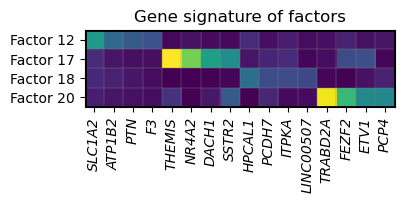

In [19]:
gene_set = marker_ours_11[:4] + marker_ours_16[:4] + marker_ours_17[:4] + marker_ours_19[:4]
profile = basis_df.iloc[[11,16,17,19], :]
profile = profile[gene_set]

f = plt.figure(figsize=(4,1))
ax = f.add_subplot(111)
im = ax.imshow(profile, cmap='viridis', interpolation='nearest', aspect='auto')
plt.yticks(np.arange(4), ["Factor "+str(i+1) for i in [11,16,17,19]], rotation=0, fontsize=10)
plt.xticks(np.arange(16), gene_set, rotation=90, fontsize=10, style="italic")
plt.title("Gene signature of factors", fontsize=12)
plt.vlines(x=np.arange(16)-0.5, ymin=-0.5, ymax=3.5, color="gray", linewidth=1.5, alpha=0.2)
plt.hlines(y=np.arange(4)-0.5, xmin=-0.5, xmax=15.5, color="gray", linewidth=1.5, alpha=0.2)
plt.vlines(x=-0.5, ymin=-0.5, ymax=3.5, color="k", linewidth=2, alpha=1)
plt.vlines(x=15.5, ymin=-0.5, ymax=3.5, color="k", linewidth=2, alpha=1)
plt.hlines(y=-0.5, xmin=-0.5, xmax=15.5, color="k", linewidth=2, alpha=1)
plt.hlines(y=3.5, xmin=-0.5, xmax=15.5, color="k", linewidth=2, alpha=1)
plt.show()

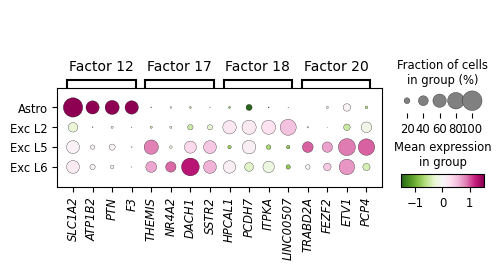

In [20]:
marker_profile = {}
marker_profile["Factor 12"] = marker_ours_11[:4]
marker_profile["Factor 17"] = marker_ours_16[:4]
marker_profile["Factor 18"] = marker_ours_17[:4]
marker_profile["Factor 20"] = marker_ours_19[:4]

fig, ax = plt.subplots(figsize=(5.5,2.3))
mt = sc.pl.dotplot(adata_ref, marker_profile, 'ct', dendrogram=False, cmap='PiYG_r', vmin=-1.5, vmax=1.5, ax=ax, 
                   show=False, var_group_rotation=0)
ax_main = mt['mainplot_ax']
for l in ax_main.get_xticklabels():
    l.set_style('italic')
plt.show()